Click [here](https://tensor4all.org/T4AJuliaTutorials/_sources/ipynbs/pythonplot.ipynb) to download the notebook locally.


# PythonPlot

[JuliaPy/PythonPlot.jl](https://github.com/JuliaPy/PythonPlot.jl) provides a Julia interface to the [Matplotlib](https://matplotlib.org/) plotting library from Python, and specifically to the matplotlib.pyplot module. This may be helpful for those who are new to Julia and come from Python.

Consider that we have source code written in Python for plotting data like below:

```python
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
x = [1, 2, 3]
y = [3, 1, 2]
ax.plot(x, y, marker="+")
```

With PythonPlot, porting this code to Julia is as simple as replacing the line `from matplotlib import pyplot as plt` with:

```julia
using PythonPlot: pyplot as plt
```

This allows us to use the familiar "plt syntax" within your Julia code.


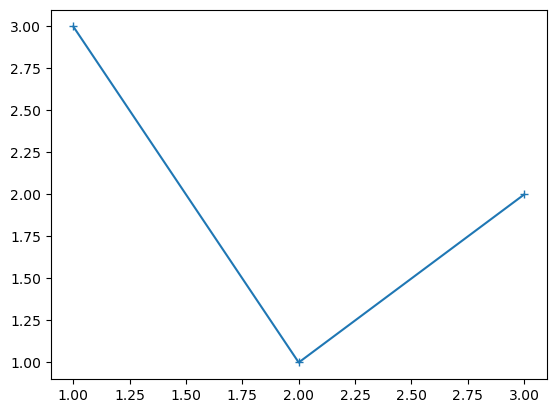

Python: [<matplotlib.lines.Line2D object at 0x7f791fe81b80>]

In [1]:
using PythonPlot: pyplot as plt

fig, ax = plt.subplots()
x = [1, 2, 3]
y = [3, 1, 2]
ax.plot(x, y, marker="+")
# use display(fig) as necessary.

As explained above, PythonPlot facilitates a smooth transition from Python to Julia for data visualization tasks. In this section, we provide valuable tips and tricks for experimenting with Julia and Jupyter Notebook or VS Code.


## TL;DR

Place the following code snippet at the beginning of your Jupyter notebook cell.

```julia
using PythonPlot: PythonPlot, pyplot as plt, Figure
_display(fig::PythonPlot.Figure) = isinteractive() ? (fig; plt.show(); nothing) : display(fig)
_display(fig) = _display(Figure(fig))
```

The explanation for why we need the above snippet is provided below.


## Preventing slow figure rendering

In some cases, Julia scripts using [`pcolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html) or [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) causes slow figure rendering. Below is a minimum working example to reproduce it:

```julia
using PythonCall: PythonCall
using PythonPlot: pyplot as plt
fig, ax = plt.subplots()
data = rand(513, 513)
c = ax.pcolor(data, cmap="RdBu_r", vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)
fig
```

If we try the code above, your Web client including VS Code freezes under heavy load.


### Workaround: Converting `fig` to `Figure(fig)::PythonPlot.Figure`

We found that converting `fig` in the line `fig, ax = plt.subplots()` to `Figure(fig)` solves the slow figure rendering issue. Namely, write code as below:


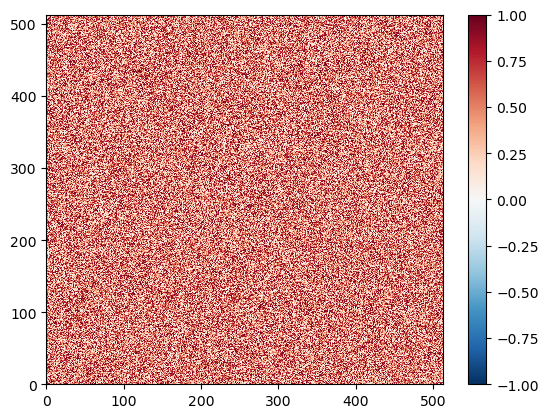

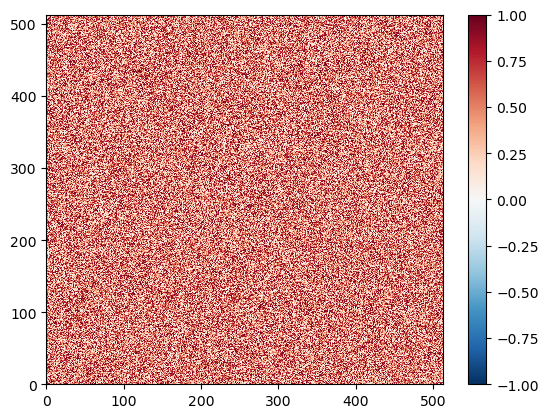

In [2]:
using PythonCall: PythonCall
using PythonPlot: pyplot as plt, Figure
fig, ax = plt.subplots()
data = rand(513, 513)
c = ax.pcolor(data, cmap="RdBu_r", vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)
Figure(fig)

The type of `fig` is `PyhonCall.Py` which handles generic Python objects. It seems that `PythonPlot.Figure` provides a better method to display figure object. Note that we can add `display(PythonPlot.gcf())` at the end of a cell instead of `display(Figure(fig))` since `gcf()` gets the current figure object as a value of `PythonCall.Figure`.


typeof(fig) = PythonCall.Core.Py
typeof(Figure(fig)) = Figure
typeof(gcf()) = Figure


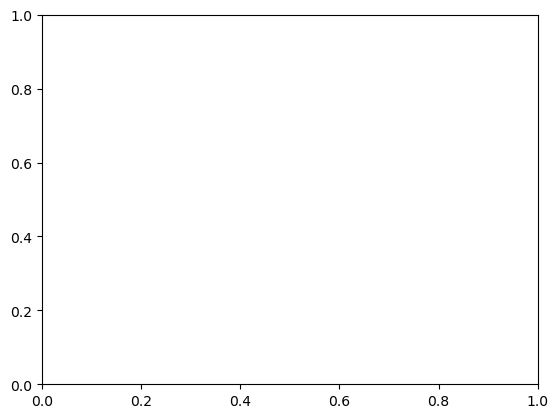

Figure

In [3]:
using PythonPlot: gcf, Figure

fig, ax = plt.subplots()
@show typeof(fig) typeof(Figure(fig)) typeof(gcf())

## Better plot handling

As explained above, PythonPlot facilitates a smooth transition from Python to Julia for data visualization tasks. In this section, we provide valuable tips and tricks for experimenting with Julia and Jupyter Notebook or VS Code.


### Difference between interactive and non-interactive session

Normally, Julia running on Jupyter Notebook uses interactive session. The `isinteractive()` function
tells us whether we are using interactive session or not.


In [4]:
# Check the following link for VS Code users
# https://github.com/microsoft/vscode-jupyter/issues/13493#issuecomment-1696484283
@doc isinteractive()

```
isinteractive() -> Bool
```

Determine whether Julia is running an interactive session.


Let's see the output or `isinteractive()`


In [5]:
@show isinteractive();

isinteractive() = true


Most users, including those viewing this notebook (generated by Jupyter Book) from a browser, will get `isinteractive() = true`.
However there is one enrivonment that outputs `isinteractive() = false`. If we've installed Julia via [juliaup](https://github.com/JuliaLang/juliaup) and using Jupyter kernel named `Julia release channel`, we might see `isinteractive()` is `false`. The difference in the result of `isinteractive()` can affect the output of a data visualization program after execution, leading to confusion for Tensors4Fields developers.

If we select kernel as a non-isinteractive session e.g., `Julia release channel`, the following code should displays a single plot. If we select kernel as an interactive session e.g., `Julia 1.10.3` which comes from IJulia it will display a same plot twice.


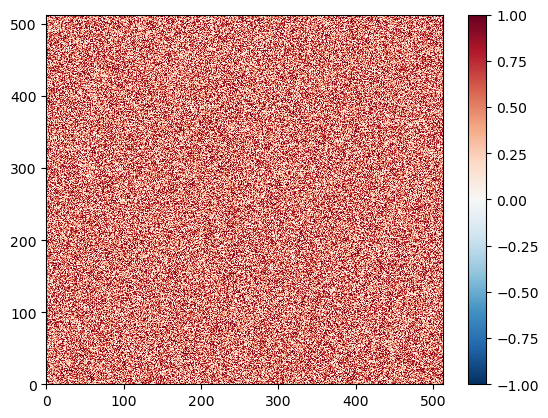

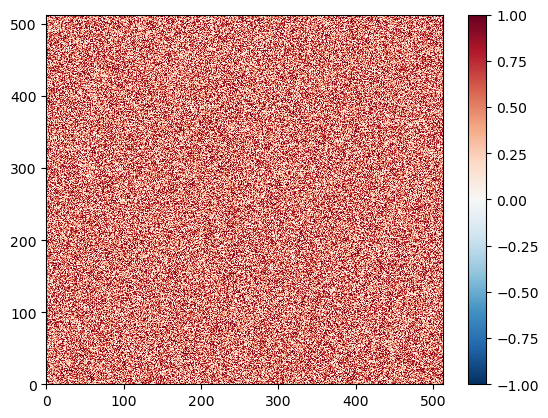

In [6]:
fig, ax = plt.subplots()
data = rand(513, 513)
c = ax.pcolor(data, cmap="RdBu_r", vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)
display(Figure(fig))

To avoid ambiguity in the resulting output by selecting the kernel of Julia, we should add the following conditional branch:


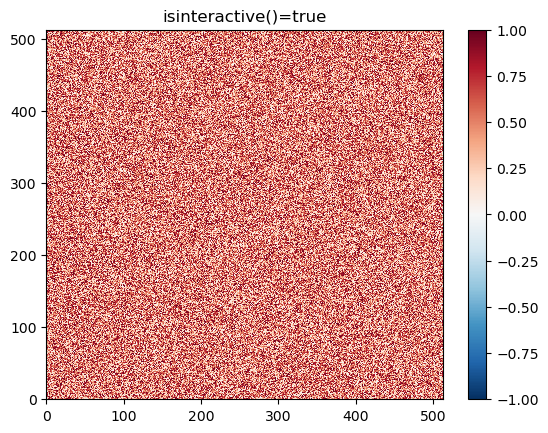

In [7]:
fig, ax = plt.subplots()
data = rand(513, 513)
c = ax.pcolor(data, cmap="RdBu_r", vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)

if isinteractive()
    ax.set_title("isinteractive()=$(isinteractive())")
    fig
    plt.show()
    #=
    Add suppress redundant output such as "Python: Text(0.5, 1.0, 'isinteractive()=true')".
    This is an optional.
    =#
    nothing
else
    ax.set_title("isinteractive()=$(isinteractive())")
    display(Figure(fig)) # This line is required to output results on non-interactive sessions
end

This can be challenging for those who want to focus on research rather than writing code. To address this, we provide a function named `_display` that handles differences in output due to the environment.


In [8]:
using PythonPlot: PythonPlot, pyplot as plt, Figure
_display(fig::PythonPlot.Figure) = isinteractive() ? (fig; plt.show(); nothing) : display(fig)
_display(fig) = _display(Figure(fig))

_display (generic function with 2 methods)

Here is a usage of `_display` function:


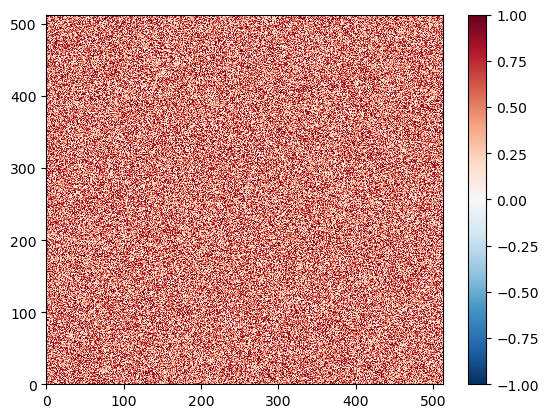

In [9]:
fig, ax = plt.subplots()
data = rand(513, 513)
c = ax.pcolor(data, cmap="RdBu_r", vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)
_display(fig)